In [238]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

path = '../Datasets/cleaned-dataset.csv'
df = pd.read_csv(path)

In [239]:
df.head(3)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BP High,BP Low
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
 12  BP High                  374 non-null    int64  
 13  BP Low                   374 non-null    int64  
dtypes: float64(1), int64(9), o

In [241]:
categoric = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
numeric = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Heart Rate', 'Daily Steps', 'BP High', 'BP Low']

In [242]:
df[numeric].describe().round(2)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Heart Rate,Daily Steps,BP High,BP Low
count,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00
mean,42.18,7.13,7.31,59.17,70.17,6816.84,128.55,84.65
std,8.67,0.80,1.20,20.83,4.14,1617.92,7.75,6.16
min,27.00,5.80,4.00,30.00,65.00,3000.00,115.00,75.00
25%,35.25,6.40,6.00,45.00,68.00,5600.00,125.00,80.00
50%,43.00,7.20,7.00,60.00,70.00,7000.00,130.00,85.00
75%,50.00,7.80,8.00,75.00,72.00,8000.00,135.00,90.00
max,59.00,8.50,9.00,90.00,86.00,10000.00,142.00,95.00


In [243]:
df.isnull().sum().sum()

0

In [244]:
df['Gender'].value_counts()

Male      189
Female    185
Name: Gender, dtype: int64

In [245]:
df['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [246]:
df['BMI Category'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64

In [247]:
df.loc[df['BMI Category']=='Normal Weight','BMI Category'] = 'Normal'
df['BMI Category'].value_counts()

Normal        216
Overweight    148
Obese          10
Name: BMI Category, dtype: int64

In [248]:
df['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [249]:
df['Sick'] = np.nan

for i in range(len(df)):
    if df.loc[i,'Sleep Disorder'] != 'No Disorder':
        df.loc[i,'Sick'] = 1
    else:
        df.loc[i,'Sick'] = 0

df['Sick'] = df['Sick'].astype(int)
df['Sick'].value_counts()

1    374
Name: Sick, dtype: int64

In [250]:
df.head(3)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BP High,BP Low,Sick
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83,1
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80,1
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80,1


<hr>

In [251]:
X = df.drop(['Person ID', 'Stress Level'], axis=1)
y = df[['Stress Level']]

In [252]:
X.head(3)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BP High,BP Low,Sick
0,Male,27,Software Engineer,6.1,6,42,Overweight,77,4200,None,126,83,1
1,Male,28,Doctor,6.2,6,60,Normal,75,10000,None,125,80,1
2,Male,28,Doctor,6.2,6,60,Normal,75,10000,None,125,80,1


In [253]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

gender_le = LabelEncoder()
occupation_le = LabelEncoder()
bmiCategory_le = LabelEncoder()
sleepDisorder_le = LabelEncoder()

for column in categoric:
    X[column] = le.fit_transform(X[column])

In [254]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for column in numeric:
    X[column] = scaler.fit_transform(X[column].values.reshape(-1,1))

In [255]:
X.head(3)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BP High,BP Low,Sick
0,1,-1.753096,9,-1.298887,-1.09828,-0.825418,2,1.654719,-1.619584,1,-0.330002,-0.268102,1
1,1,-1.637643,1,-1.173036,-1.09828,0.039844,0,1.170474,1.970077,1,-0.459239,-0.755640,1
2,1,-1.637643,1,-1.173036,-1.09828,0.039844,0,1.170474,1.970077,1,-0.459239,-0.755640,1


In [256]:
y.head(3)

,Stress Level
0,6
1,8
2,8


In [257]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [258]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [259]:
# from sklearn.linear_model import LinearRegression

# lr = LinearRegression()
# lr.fit(X_train, y_train)

In [260]:
# y_pred = lr.predict(X_test)

In [261]:
# from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# mape = mean_absolute_percentage_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)

# print(f"""
# MAPE: {mape:.2f}
# RMSE: {rmse:.2f}
# R2: {r2:.2f}
# """)

In [262]:
# import pickle

# pickle.dump(lr, open('../Models/linear-regression.pkl', 'wb'))

In [263]:
# df.to_csv('../streamlit/Dataset/dataset.csv', index=False)

<hr>

## 5. Creating and Evaluating the models

Now that we have the data ready to be used, we will create multiple models and evaluate them using `Kfold` and `cross_val_score` from `sklearn.model_selection`.

We will be using the following models: Decision Tree, Random Forest, Logistic Regression, KNN, and XGBoost.

In [264]:
model_list = [
    ('Random Forest', RandomForestClassifier(n_estimators=100, max_features=3)),
    ('KNN', KNeighborsClassifier()),
    ('LogReg', LogisticRegression())
]

results_scaled = []
names_of_models = []

for name, model in model_list:
    kfold = KFold(n_splits=5, random_state=7, shuffle=True)
    cv_results = cross_val_score(
        model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    results_scaled.append(cv_results)
    names_of_models.append(name)
df_results_scaled = pd.DataFrame(results_scaled, index=names_of_models)
df_results_scaled = df_results_scaled.transpose()

df_results_scaled

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

,Random Forest,KNN,LogReg
0,0.933333,0.866667,0.900000
1,0.950000,0.883333,0.866667
2,0.916667,0.900000,0.883333
3,0.966667,0.916667,0.933333
4,1.000000,0.932203,0.966102


In [265]:
df_results_scaled.mean()

Random Forest    0.953333
KNN              0.899774
LogReg           0.909887
dtype: float64

* ***Random Forest, Logistic Regression have the highest overall accuracy***

### 1. Logistic Regression
Creating and Fitting the Logistic Regression model to the training set

In [266]:
log_reg_model = LogisticRegression().fit(X_train_scaled,y_train)

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


***Creating and Plotting the Confusion Matrix for the Test Set***

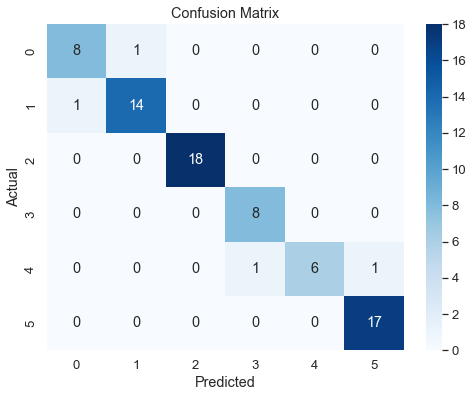

In [267]:
# Getting the predictions for the test set
pred = log_reg_model.predict(X_test_scaled)

# Creating the confusion matrix
c = confusion_matrix(y_test, pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for labels
sns.heatmap(c, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [268]:
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test, pred)))

print('Micro Precision: {:.2f}'.format(
    precision_score(y_test, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(
    recall_score(y_test, pred, average='micro')))
print(
    'Micro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(
    precision_score(y_test, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(
    recall_score(y_test, pred, average='macro')))
print(
    'Macro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(
    precision_score(y_test, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(
    recall_score(y_test, pred, average='weighted')))
print(
    'Weighted F1-score: {:.2f}'.format(f1_score(y_test, pred, average='weighted')))

# print('\nClassification Report\n')
# print(classification_report(y_test, pred, target_names=[
#       'Insomnia', 'None', 'Sleep Apnea']))


Accuracy: 0.9467

Micro Precision: 0.95
Micro Recall: 0.95
Micro F1-score: 0.95

Macro Precision: 0.94
Macro Recall: 0.93
Macro F1-score: 0.93

Weighted Precision: 0.95
Weighted Recall: 0.95
Weighted F1-score: 0.95


### 2. Random Forest
Creating and Fitting the Random Forest model to the training set

In [269]:
random_forest_model = RandomForestClassifier().fit(X_train_scaled,y_train)

/var/folders/3g/_pzl29g52kj3jbrt418f0z6h0000gn/T/ipykernel_5176/2723202275.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model = RandomForestClassifier().fit(X_train_scaled,y_train)


***Creating and Plotting the Confusion Matrix for the Test Set***

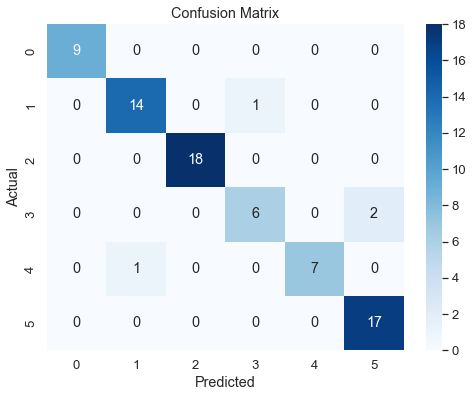

In [270]:
# Getting the predictions for the test set
pred = random_forest_model.predict(X_test_scaled)

# Creating the confusion matrix
c = confusion_matrix(y_test, pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for labels
sns.heatmap(c, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [271]:
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test, pred)))

print('Micro Precision: {:.2f}'.format(
    precision_score(y_test, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(
    recall_score(y_test, pred, average='micro')))
print(
    'Micro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(
    precision_score(y_test, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(
    recall_score(y_test, pred, average='macro')))
print(
    'Macro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(
    precision_score(y_test, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(
    recall_score(y_test, pred, average='weighted')))
print(
    'Weighted F1-score: {:.2f}'.format(f1_score(y_test, pred, average='weighted')))

# print('\nClassification Report\n')
# print(classification_report(y_test, pred, target_names=[
#       'Insomnia', 'None', 'Sleep Apnea']))


Accuracy: 0.9467

Micro Precision: 0.95
Micro Recall: 0.95
Micro F1-score: 0.95

Macro Precision: 0.95
Macro Recall: 0.93
Macro F1-score: 0.94

Weighted Precision: 0.95
Weighted Recall: 0.95
Weighted F1-score: 0.95


## Tuning

In [272]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [273]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
param_grid

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [2, 4],
 'min_samples_split': [2, 5],
 'min_samples_leaf': [1, 2],
 'bootstrap': [True, False]}

In [274]:
rfc = RandomForestClassifier()

In [275]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [276]:
rf_grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [277]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 48}

In [278]:
pred_rf=rf_grid.predict(X_test_scaled)

In [279]:
cm_rf = confusion_matrix(y_test, pred_rf)
cm_rf

array([[ 9,  0,  0,  0,  0,  0],
       [ 1, 13,  0,  1,  0,  0],
       [ 0,  0, 17,  1,  0,  0],
       [ 0,  0,  0,  6,  0,  2],
       [ 0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0, 17]])

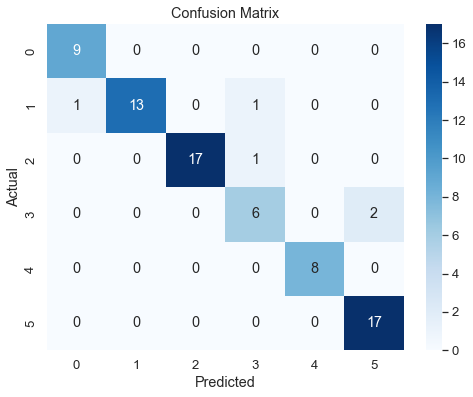

In [280]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for labels
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [281]:
print (f'Train Accuracy - : {rf_grid.score(X_train_scaled,y_train):.3f}')
print (f'Test Accuracy - : {rf_grid.score(X_test_scaled,y_test):.3f}')

Train Accuracy - : 0.960
Test Accuracy - : 0.933


## 6. Save Model

In [282]:
import joblib

joblib.dump(gender_le, '../streamlit/Models/gender_encoder.pkl')
joblib.dump(occupation_le, '../streamlit/Models/occupation_encoder.pkl')
joblib.dump(bmiCategory_le, '../streamlit/Models/bmi_category_encoder.pkl')
joblib.dump(sleepDisorder_le, '../streamlit/Models/sleep_disorder_encoder.pkl')

joblib.dump(scaler, '../streamlit/Models/scaler.pkl')

['../streamlit/Models/scaler.pkl']

In [283]:
import pickle

pickle.dump(rfc, open('../Models/linear-regression.pkl', 'wb'))

pickle.dump(rfc, open('../streamlit/Models/model.pkl', 'wb'))

In [284]:
df.to_csv('../streamlit/Dataset/dataset.csv', index=False)

[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17; total time=   0.2s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=   0.2s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=41; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=48; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=72; total time=   0.6s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_s

[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=48; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=64; total time=   0.5s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.5s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_s

[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17; total time=   0.2s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=41; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=48; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=64; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=72; total time=   0.5s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_s

[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=41; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=56; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=64; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=72; total time=   0.5s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_s